In [42]:
#Ha = The mean trip duration of Citi Bike users under the age of 35 is more than the mean trip duration of an average user, significance level = 0.05
#H0 = The mean trip duration of Citi Bike users under the age of 35 is the same or less than the mean trip duration of an average user, significance level = 0.05.

# Ha = mean_trip_duration (under age 35) > mean_trip_duration (general pop)
# H0 = mean_trip_duration (under age 35) <= mean_trip_duration (general pop)

In [44]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os


%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [3]:

os.getenv('PUI2016')

'/home/cusp/nm2565/PUI2016'

In [4]:
os.getenv('PUIDATA')


'/home/cusp/nm2565/PUIdata'

In [5]:
!unzip 201512-citibike-tripdata.zip

Archive:  201512-citibike-tripdata.zip
  inflating: 201512-citibike-tripdata.csv  


In [6]:
citibike = pd.read_csv('201512-citibike-tripdata.csv')
citibike.head

<bound method NDFrame.head of         tripduration            starttime             stoptime  \
0                475   12/1/2015 07:35:36   12/1/2015 07:43:32   
1                684   12/1/2015 07:38:15   12/1/2015 07:49:39   
2               1063   12/1/2015 07:44:49   12/1/2015 08:02:33   
3               1075   12/1/2015 08:02:29   12/1/2015 08:20:24   
4                293   12/1/2015 08:06:37   12/1/2015 08:11:30   
5                812   12/1/2015 08:07:57   12/1/2015 08:21:30   
6                551   12/1/2015 08:08:53   12/1/2015 08:18:05   
7               1531   12/1/2015 08:12:10   12/1/2015 08:37:42   
8               1617   12/1/2015 08:26:17   12/1/2015 08:53:14   
9                525   12/1/2015 08:28:37   12/1/2015 08:37:23   
10               721   12/1/2015 08:43:25   12/1/2015 08:55:27   
11               770   12/1/2015 08:47:46   12/1/2015 09:00:37   
12               606   12/1/2015 08:47:52   12/1/2015 08:57:59   
13               773   12/1/2015 08:48:09   12

In [7]:
citibike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [8]:
citibike.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [10]:
citibike.head()

,tripduration,birth year
0,475,1983.0
1,684,1975.0
2,1063,1966.0
3,1075,1985.0
4,293,1968.0


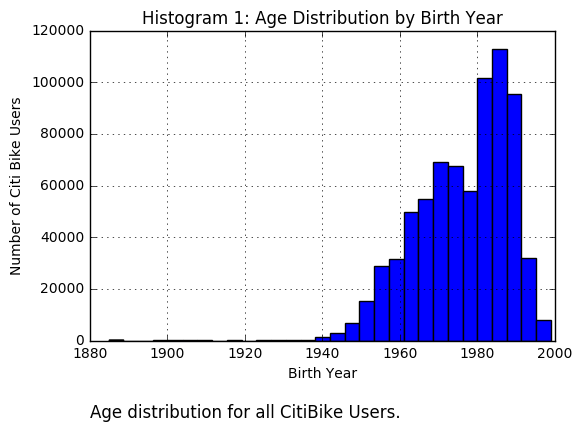

In [31]:
age_hist = citibike['birth year'].hist(bins = 30)
age_hist.set_title("Histogram 1: Age Distribution by Birth Year")
age_hist.set_xlabel("Birth Year")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(1880, -30000, 'Age distribution for all CitiBike Users.', fontsize = 12 )

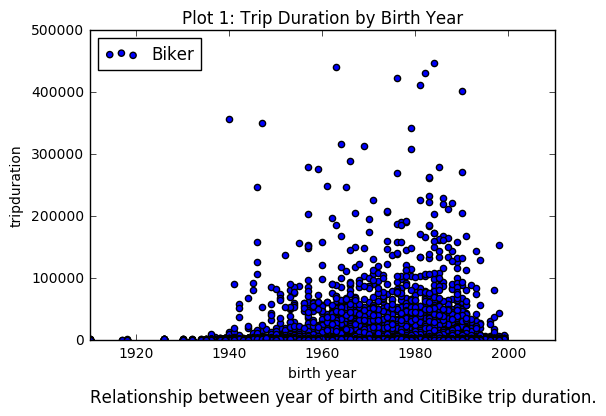

In [35]:
citibike.plot(x = 'birth year', y = 'tripduration', kind = 'scatter', label = 'Biker')
plt.axis([1910, 2010, 0, 500000])
plt.title('Plot 1: Trip Duration by Birth Year')
plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.legend(loc = 'upper left')
#citibike.plot(x = 'birth year', y = 'tripduration', kind = 'bar')

#citibike.plot(x = 'birth year', y = 'tripduration', kind = 'scatter')
#plt.axis([1930,2015,0,500000]) #axis allows you to work on rows and columns

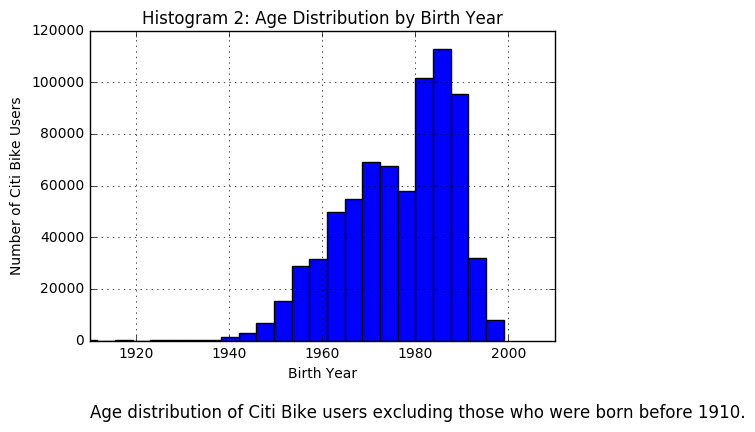

In [39]:
age_hist = citibike['birth year'].hist(bins = 30)
plt.axis([1910, 2010, 0, 120000])
age_hist.set_title("Histogram 2: Age Distribution by Birth Year")
age_hist.set_xlabel("Birth Year")
age_hist.set_ylabel("Number of Citi Bike Users")
plt.text(1910, -30000, 'Age distribution of Citi Bike users excluding those who were born before 1910.', fontsize = 12)

In [16]:
citibike_35 = citibike[citibike['birth year'] > 1980]

In [18]:
citibike_35.head()

,tripduration,birth year
0,475,1983.0
3,1075,1985.0
7,1531,1988.0
8,1617,1986.0
10,721,1982.0


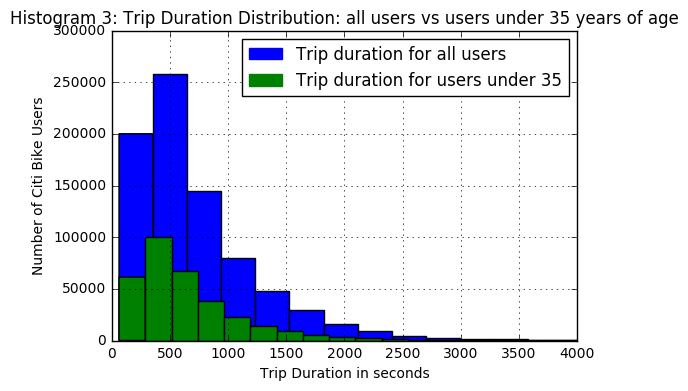

In [45]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

age_hist = citibike['tripduration'].hist(bins = 10000)
age_hist = citibike_35['tripduration'].hist(bins = 10000)
plt.axis([0, 4000, 0, 300000])
age_hist.set_title(    "Histogram 3: Trip Duration Distribution: all users vs users under 35 years of age")
age_hist.set_xlabel("Trip Duration in seconds")
age_hist.set_ylabel("Number of Citi Bike Users")
blue_patch = mpatches.Patch(color='blue', label='Trip duration for all users')
green_patch = mpatches.Patch(color='green', label='Trip duration for users under 35')
plt.legend(handles=[blue_patch, green_patch])

In [ ]:
#Now performing Z test to check the hypothesis. 

In [23]:
mean_pop = citibike.mean()
mean_pop

tripduration     945.711619
birth year      1976.278869
dtype: float64

In [24]:
mean_35 = citibike_35.mean()
mean_35

tripduration     753.569816
birth year      1986.786407
dtype: float64

In [25]:
stdev_pop = citibike.std()
stdev_pop

tripduration    9684.869098
birth year        11.832226
dtype: float64

In [27]:
stdev_35 = citibike_35.std()
stdev_35

tripduration    6957.030268
birth year         3.911396
dtype: float64

In [37]:
len(citibike)

804125

In [36]:
z_test = ((mean_pop) - citibike_35.mean())/(stdev_pop/sqrt(len(citibike)))
z_test

tripduration     17.790571
birth year     -796.335834
dtype: float64